In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import os

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


import warnings


In [93]:
data = pd.read_csv("/Users/omiee/Documents/GitHub/MachineLearning/Linear Regression/Stock Prediction/NVidia_stock_history.csv")
data.head() 

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1999-01-22 00:00:00-05:00,0.040129,0.044786,0.035590,0.037621,2714688000,0.0,0.0
1,1999-01-25 00:00:00-05:00,0.040607,0.042039,0.037621,0.041562,510480000,0.0,0.0
2,1999-01-26 00:00:00-05:00,0.042039,0.042876,0.037740,0.038337,343200000,0.0,0.0
3,1999-01-27 00:00:00-05:00,0.038457,0.039412,0.036307,0.038218,244368000,0.0,0.0
4,1999-01-28 00:00:00-05:00,0.038218,0.038457,0.037859,0.038098,227520000,0.0,0.0


In [94]:
#Understand data and data types
data.info()
data.describe(include='all') #describe to display NaN values as well

"""
plt.figure(figsize=(10,5))
plt.plot(data['Date'], data['Close'], label='Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('NVIDIA Stock Price Over Time')
plt.legend()
plt.show()
"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6442 entries, 0 to 6441
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          6442 non-null   object 
 1   Open          6442 non-null   float64
 2   High          6442 non-null   float64
 3   Low           6442 non-null   float64
 4   Close         6442 non-null   float64
 5   Volume        6442 non-null   int64  
 6   Dividends     6442 non-null   float64
 7   Stock Splits  6442 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 402.8+ KB


"\nplt.figure(figsize=(10,5))\nplt.plot(data['Date'], data['Close'], label='Close Price')\nplt.xlabel('Date')\nplt.ylabel('Close Price')\nplt.title('NVIDIA Stock Price Over Time')\nplt.legend()\nplt.show()\n"

In [95]:
#check null values
data.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

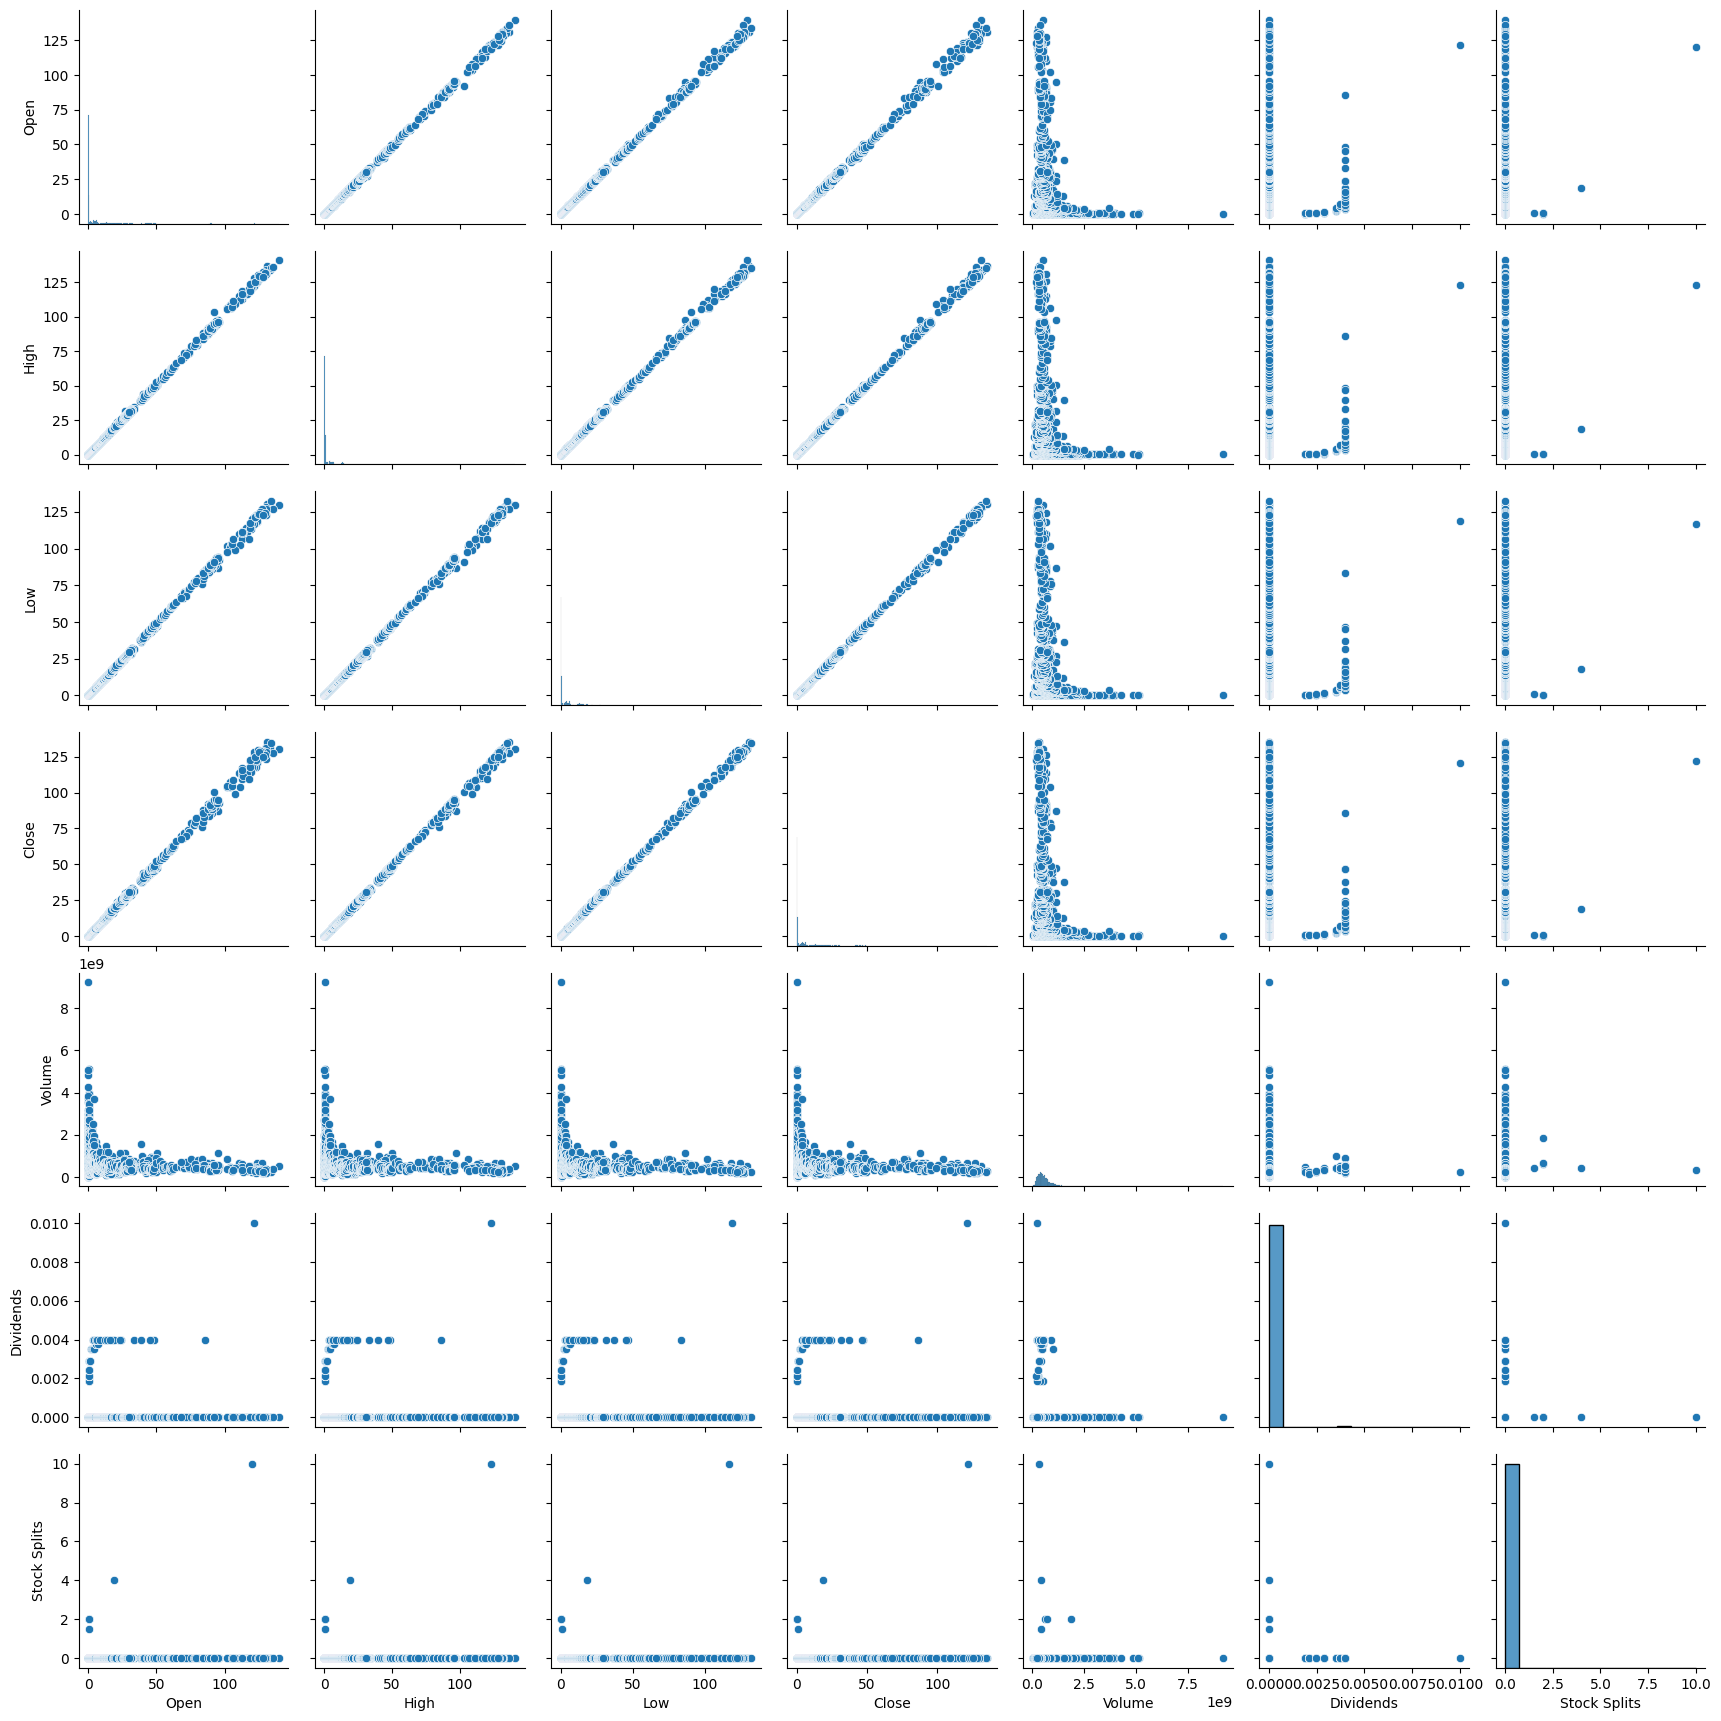

In [96]:
sns.pairplot(data)
plt.show()

Split All data into training and testing data

In [97]:
#use open, high, low, last to predict close price
x = data[['High','Low','Open','Volume']].values
y = data[['Close']].values

In [98]:
#split data LEARN
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [99]:
lm = LinearRegression()
lm.fit(x_train, y_train)

lm.coef_


array([[ 8.05509733e-01,  9.32651185e-01, -7.33972436e-01,
         3.67540512e-12]])

In [100]:
"""
poly = PolynomialFeatures(degree=1)
x_poly_train = poly.fit_transform(x_train)
x_poly_test = poly.fit_transform(x_test)

model_poly = LinearRegression()
model_poly.fit(x_poly_train, y_train)
"""

'\npoly = PolynomialFeatures(degree=1)\nx_poly_train = poly.fit_transform(x_train)\nx_poly_test = poly.fit_transform(x_test)\n\nmodel_poly = LinearRegression()\nmodel_poly.fit(x_poly_train, y_train)\n'

In [101]:
lm.score(x_train, y_train)
#model_poly.score(x_poly_train, y_train)



0.9998699950574393

Run Model using Test Data

In [102]:
#Linear Regression

predictions = lm.predict(x_test)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'R-squared Score: {r2}')

Mean Squared Error: 0.05852182476693891
R-squared Score: 0.9998347934576123


In [103]:
#Polynomial Regression
"""
y_pred_poly = model_poly.predict(x_poly_test)

mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f'Polynomial Regression MSE: {mse_poly}')
print(f'Polynomial Regression R²: {r2_poly}')
"""


"\ny_pred_poly = model_poly.predict(x_poly_test)\n\nmse_poly = mean_squared_error(y_test, y_pred_poly)\nr2_poly = r2_score(y_test, y_pred_poly)\n\nprint(f'Polynomial Regression MSE: {mse_poly}')\nprint(f'Polynomial Regression R²: {r2_poly}')\n"

In [104]:
##why flatten
dframe = pd.DataFrame({'actual': y_test.flatten(), 'Predicted': predictions.flatten()})
#dframe = pd.DataFrame({'actual': y_test.flatten(), 'Predicted': y_pred_poly.flatten()})

dframe.head()

,actual,Predicted
0,0.588630,0.590169
1,6.524908,6.531772
2,4.017655,4.008132
3,18.852673,18.829043
4,0.360776,0.358708


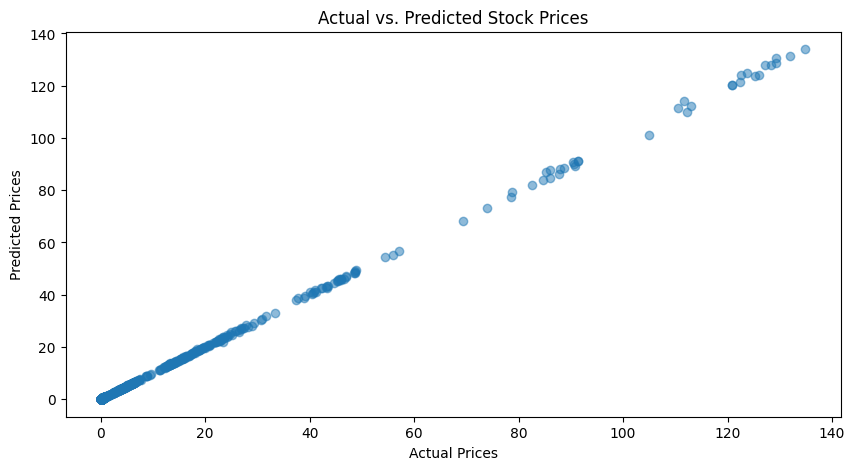

In [105]:
#load actual and predicted value alongside
plt.figure(figsize=(10,5))
plt.scatter(y_test, predictions, alpha=0.5)
#plt.scatter(y_test, y_pred_poly, alpha=0.5)

plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Stock Prices")
plt.show()

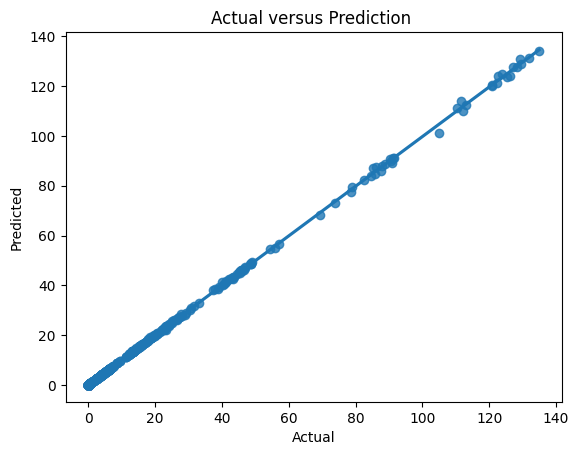

In [106]:
sns.regplot(x="actual", y="Predicted", data=dframe)
plt.title('Actual versus Prediction ')
plt.xlabel('Actual', fontsize=10)                         
plt.ylabel('Predicted', fontsize=10)   
plt.show()

